In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt 
import platform 

In [3]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': 
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') 
    rc('font', family=font_name)

In [4]:
df = pd.read_csv("../data/전처리데이터/성동구 최종 데이터_수정.csv", encoding='cp949')

In [5]:
# 데이터 shape 파악
df.shape

(432, 18)

In [6]:
# 데이터 통계량 파악
df.describe()

,Unnamed: 0,ARS-ID,버스 총 승차수,쉼터여부,NODE_ID,위도,경도,버스 수,평균 배차 간격,최대 배차 간격,지하철역 최단거리(m),도로폭_숫자,인구
count,432.000000,432.000000,432.000000,432.000000,4.320000e+02,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,215.500000,4500.872685,6629.250000,0.104167,1.035230e+08,37.552547,127.034962,2.138889,11.758866,13.277778,409.628611,2.703704,17630.340278
std,124.851912,297.861940,10421.095101,0.305831,4.445864e+05,0.008757,0.014513,1.891283,3.756025,5.279797,230.309041,2.119446,5110.674204
min,0.000000,4001.000000,5.000000,0.000000,1.030000e+08,37.536286,127.011096,1.000000,7.000000,7.000000,7.611000,1.000000,10343.000000
25%,107.750000,4208.750000,761.500000,0.000000,1.030001e+08,37.545701,127.024131,1.000000,9.000000,10.000000,262.363000,1.000000,13893.000000
50%,215.500000,4540.500000,2500.000000,0.000000,1.039000e+08,37.552492,127.033368,1.000000,10.400000,13.000000,387.030000,2.000000,15608.000000
75%,323.250000,4771.250000,8296.000000,0.000000,1.039002e+08,37.558696,127.044866,3.000000,13.000000,14.250000,530.697000,4.000000,22459.000000
max,431.000000,6507.000000,73750.000000,1.000000,1.039003e+08,37.571953,127.072545,11.000000,23.000000,40.000000,1178.706000,9.000000,26534.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    432 non-null    int64  
 1   ARS-ID        432 non-null    int64  
 2   버스 총 승차수      432 non-null    int64  
 3   쉼터여부          432 non-null    int64  
 4   NODE_ID       432 non-null    int64  
 5   정류소명          432 non-null    object 
 6   위도            432 non-null    float64
 7   경도            432 non-null    float64
 8   버스 수          432 non-null    int64  
 9   버스 노선 리스트     432 non-null    object 
 10  평균 배차 간격      432 non-null    float64
 11  최대 배차 간격      432 non-null    int64  
 12  가장 가까운 지하철역   432 non-null    object 
 13  지하철역 최단거리(m)  432 non-null    float64
 14  도로명           432 non-null    object 
 15  도로폭           432 non-null    object 
 16  도로폭_숫자        432 non-null    int64  
 17  인구            432 non-null    int64  
dtypes: float64(4), int64(9), objec

In [8]:
# 결측치 개수 파악
df.isnull().sum().to_frame('nan_count')

,nan_count
Unnamed: 0,0
ARS-ID,0
버스 총 승차수,0
쉼터여부,0
NODE_ID,0
정류소명,0
위도,0
경도,0
버스 수,0
버스 노선 리스트,0


In [9]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
Unnamed: 0,0.0
ARS-ID,0.0
버스 총 승차수,0.0
쉼터여부,0.0
NODE_ID,0.0
정류소명,0.0
위도,0.0
경도,0.0
버스 수,0.0
버스 노선 리스트,0.0


In [10]:
# 변수 타입 파악
df.dtypes

Unnamed: 0        int64
ARS-ID            int64
버스 총 승차수          int64
쉼터여부              int64
NODE_ID           int64
정류소명             object
위도              float64
경도              float64
버스 수              int64
버스 노선 리스트        object
평균 배차 간격        float64
최대 배차 간격          int64
가장 가까운 지하철역      object
지하철역 최단거리(m)    float64
도로명              object
도로폭              object
도로폭_숫자            int64
인구                int64
dtype: object

In [11]:
#성동구 쉼터있는 버스정류장 45개,쉼터 없는 버스정류장 387개
df['쉼터여부'].value_counts()

0    387
1     45
Name: 쉼터여부, dtype: int64

In [12]:
#사용할 변수6개 통계적 수치확인
df['버스 총 승차수'].describe()

count      432.000000
mean      6629.250000
std      10421.095101
min          5.000000
25%        761.500000
50%       2500.000000
75%       8296.000000
max      73750.000000
Name: 버스 총 승차수, dtype: float64

In [13]:
df['버스 수'].describe()

count    432.000000
mean       2.138889
std        1.891283
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       11.000000
Name: 버스 수, dtype: float64

In [14]:
df['지하철역 최단거리(m)'].describe()

count     432.000000
mean      409.628611
std       230.309041
min         7.611000
25%       262.363000
50%       387.030000
75%       530.697000
max      1178.706000
Name: 지하철역 최단거리(m), dtype: float64

In [15]:
df['평균 배차 간격'].describe()

count    432.000000
mean      11.758866
std        3.756025
min        7.000000
25%        9.000000
50%       10.400000
75%       13.000000
max       23.000000
Name: 평균 배차 간격, dtype: float64

In [16]:
df['도로폭_숫자'].describe()

count    432.000000
mean       2.703704
std        2.119446
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: 도로폭_숫자, dtype: float64

In [17]:
df['인구'].describe()

count      432.000000
mean     17630.340278
std       5110.674204
min      10343.000000
25%      13893.000000
50%      15608.000000
75%      22459.000000
max      26534.000000
Name: 인구, dtype: float64

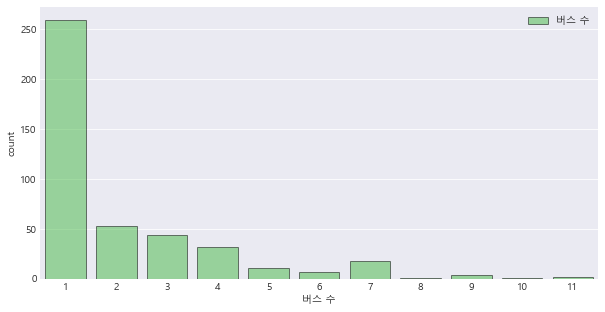

In [18]:
## 연속형 그래프
# plt.figure(figsize=(10,5))
# kde=sns.kdeplot(df['버스 수'],label='버스 수',color = 'green') 
# kde.set_xlabel('버스 수')
# kde.set_ylabel("빈도")
# plt.show()

# 막대그래프
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = '버스 수',color = 'limegreen', alpha = 0.5, edgecolor='k')
plt.legend(labels=["버스 수"])
plt.show()

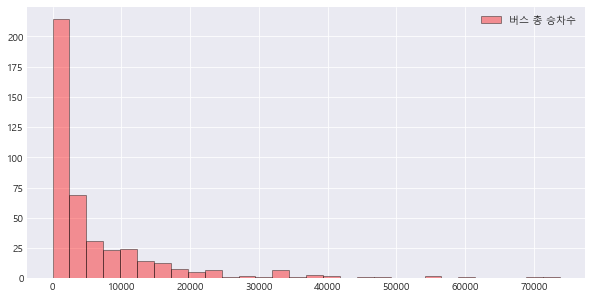

In [19]:
## 연속형 그래프
# plt.figure(figsize=(10,5))
# kde=sns.kdeplot(df['버스 총 승차수'], label='버스 총 승차수',color='red')
# plt.legend(labels=['버스 총 승차수'])
# kde.set_xlabel('버스 총 승차수')
# kde.set_ylabel("빈도")
# plt.show()

# 히스토그램
plt.figure(figsize=(10,5))
plt.hist(df['버스 총 승차수'], bins=30, label='버스 총 승차수',color = 'red', alpha = 0.4, edgecolor='k')
plt.legend(labels=["버스 총 승차수"])
plt.show()

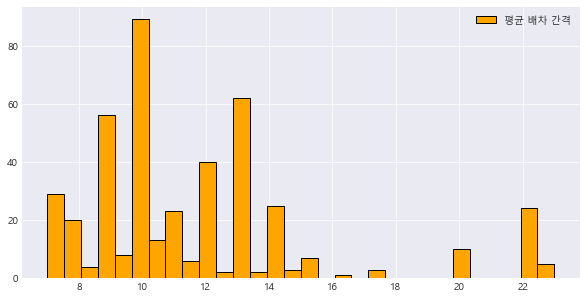

In [20]:
# # 연속형 그래프
# plt.figure(figsize=(10,5))
# kde=sns.kdeplot(df['평균 배차 간격'], label='평균 배차 간격',color='blue')
# plt.legend(labels=["평균 배차 간격"])
# kde.set_xlabel('평균 배차 간격')
# kde.set_ylabel("빈도")
# plt.show()

# 히스토그램
plt.figure(figsize=(10,5))
plt.hist(df['평균 배차 간격'], bins=30, label='평균 배차 간격',color = 'orange', edgecolor='k')
plt.legend(labels=["평균 배차 간격"])
plt.show()

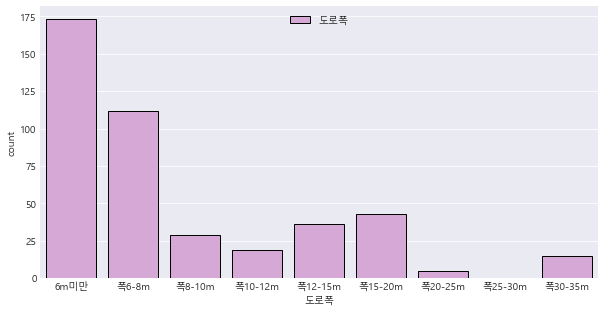

In [21]:
# # 연속형 그래프
# plt.figure(figsize=(10,5))
# kde=sns.kdeplot(df['도로폭_숫자'],color = 'violet')
# plt.legend(labels=["도로폭"])
# kde.set_xlabel('도로폭')
# kde.set_ylabel("빈도")
# plt.show()

# 막대그래프
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = '도로폭',color = 'plum', edgecolor='k', order = ['6m미만', '폭6-8m','폭8-10m','폭10-12m','폭12-15m','폭15-20m'
                                                                          ,'폭20-25m','폭25-30m','폭30-35m'])


plt.legend(labels=["도로폭"])
plt.show()

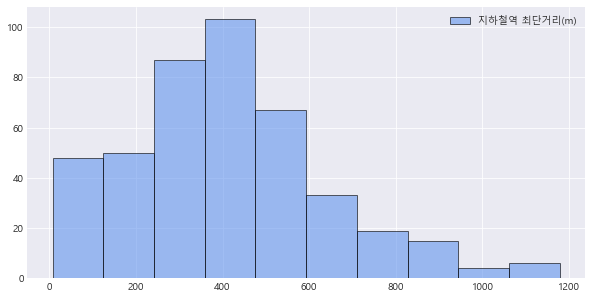

In [22]:
# # 연속형 그래프
# plt.figure(figsize=(10,5))
# kde=sns.kdeplot(df['지하철역 최단거리(m)'],color = 'lightseagreen')
# plt.legend(labels=['지하철역 최단거리(m)'])
# kde.set_xlabel('지하철역 최단거리(m)')
# kde.set_ylabel("빈도")
# plt.show()

# 히스토그램
plt.figure(figsize=(10,5))
plt.hist(df['지하철역 최단거리(m)'], bins=10, label='지하철역 최단거리(m)',color = 'cornflowerblue', alpha = 0.6, edgecolor='k')
plt.legend()
plt.show()

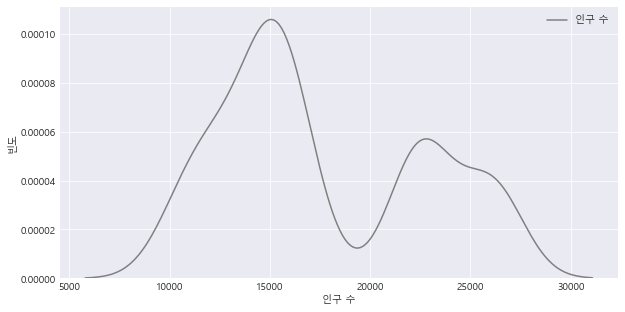

In [23]:
# 연속형 그래프
plt.figure(figsize=(10,5))
kde=sns.kdeplot(df['인구'],color = 'grey')
plt.legend(labels=['인구 수'])
kde.set_xlabel('인구 수')
kde.set_ylabel("빈도")
plt.show()

# # 히스토그램
# plt.figure(figsize=(10,5))
# plt.hist(df['인구'], bins=10, label='인구 수',color = 'darkgrey', alpha = 0.8, edgecolor='k')
# plt.legend()
# plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
#평균0 표쥰편차1로 스케일링
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df[['버스 수','버스 총 승차수','평균 배차 간격','지하철역 최단거리(m)','도로폭_숫자','인구']])
df1 = pd.DataFrame(df_std, columns=['버스 수','버스 총 승차수','평균 배차 간격','지하철역 최단거리(m)','도로폭','인구'])
df1

,버스 수,버스 총 승차수,평균 배차 간격,지하철역 최단거리(m),도로폭,인구
0,0.5,0.532443,0.416875,0.178931,0.25,0.069915
1,0.8,0.505539,0.430625,0.307582,0.25,0.069915
2,0.9,0.832138,0.437500,0.109859,0.25,0.069915
3,0.4,0.243596,0.362500,0.029713,0.50,0.369156
4,1.0,0.474636,0.323750,0.013485,0.50,0.369156
...,...,...,...,...,...,...
427,0.0,0.006089,0.437500,0.169657,0.00,0.109073
428,0.0,0.010157,0.437500,0.236785,0.00,0.109073
429,0.0,0.003512,0.437500,0.242049,0.00,0.109073
430,0.0,0.040233,0.437500,0.150426,0.00,0.109073


In [25]:
# 피쳐들을 스케일링 한후 사용할 데이터
df1.insert(0,'쉼터여부',df['쉼터여부'])
df1

,쉼터여부,버스 수,버스 총 승차수,평균 배차 간격,지하철역 최단거리(m),도로폭,인구
0,0,0.5,0.532443,0.416875,0.178931,0.25,0.069915
1,0,0.8,0.505539,0.430625,0.307582,0.25,0.069915
2,0,0.9,0.832138,0.437500,0.109859,0.25,0.069915
3,1,0.4,0.243596,0.362500,0.029713,0.50,0.369156
4,1,1.0,0.474636,0.323750,0.013485,0.50,0.369156
...,...,...,...,...,...,...,...
427,0,0.0,0.006089,0.437500,0.169657,0.00,0.109073
428,0,0.0,0.010157,0.437500,0.236785,0.00,0.109073
429,0,0.0,0.003512,0.437500,0.242049,0.00,0.109073
430,0,0.0,0.040233,0.437500,0.150426,0.00,0.109073


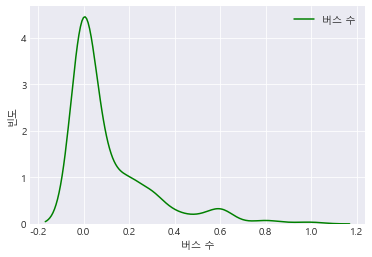

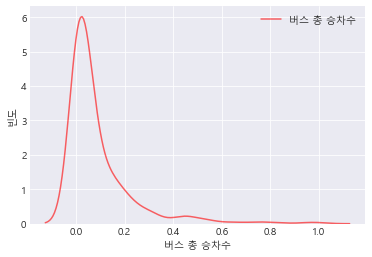

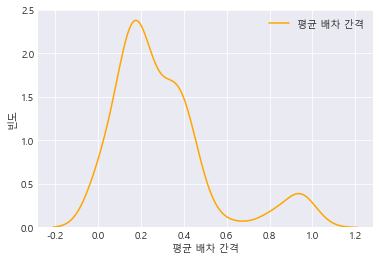

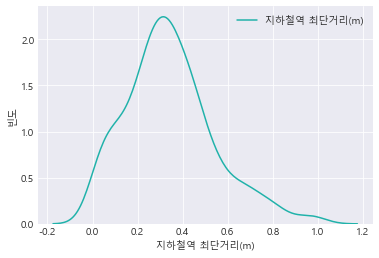

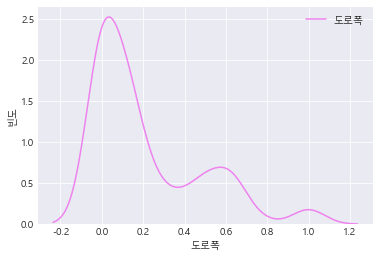

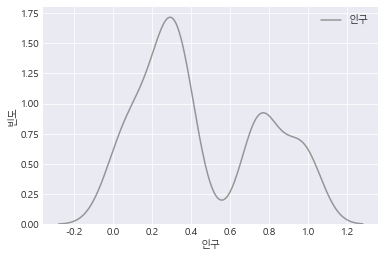

In [26]:
# 표준화 이후 데이터들 분포
kde=sns.kdeplot(df1['버스 수'], color = 'green') 
kde.set_xlabel('버스 수')
kde.set_ylabel("빈도")
plt.legend(labels=['버스 수'])
plt.show()

kde=sns.kdeplot(df1['버스 총 승차수'], color='red', alpha = 0.6) 
kde.set_xlabel('버스 총 승차수')
kde.set_ylabel("빈도")
plt.legend(labels=['버스 총 승차수'])
plt.show()

kde=sns.kdeplot(df1['평균 배차 간격'],color = 'orange') 
kde.set_xlabel('평균 배차 간격')
kde.set_ylabel("빈도")
plt.legend(labels=['평균 배차 간격'])
plt.show()

kde=sns.kdeplot(df1['지하철역 최단거리(m)'],color = 'lightseagreen') 
kde.set_xlabel('지하철역 최단거리(m)')
kde.set_ylabel("빈도")
plt.legend(labels=['지하철역 최단거리(m)'])
plt.show()

kde=sns.kdeplot(df1['도로폭'],color = 'violet') 
kde.set_xlabel('도로폭')
kde.set_ylabel("빈도")
plt.legend(labels=['도로폭'])
plt.show()

kde=sns.kdeplot(df1['인구'],color = 'grey', alpha = 0.8) 
kde.set_xlabel('인구')
kde.set_ylabel("빈도")
plt.legend(labels=['인구'])
plt.show()

In [27]:
df

,Unnamed: 0,ARS-ID,버스 총 승차수,쉼터여부,NODE_ID,정류소명,위도,경도,버스 수,버스 노선 리스트,평균 배차 간격,최대 배차 간격,가장 가까운 지하철역,지하철역 최단거리(m),도로명,도로폭,도로폭_숫자,인구
0,0,4001,39270,0,103000001,답십리역사거리,37.565426,127.054368,6,"['9403', '370', '303', 'N30', '721', '130']",13.67,40,답십리,217.156,천호대로,폭8-10m,3,11475
1,1,4002,37286,0,103000002,청년회의소.서울새활용플라자,37.561952,127.060479,9,"['9403', '3216', '2221', '370', '3220', '303',...",13.89,40,장한평,367.819,천호대로,폭8-10m,3,11475
2,2,4003,61371,0,103000003,장한평역,37.561131,127.066098,10,"['9403', '2416', '3216', '2221', '370', '3220'...",14.00,40,장한평,136.266,천호대로,폭8-10m,3,11475
3,3,4101,17969,1,103000004,상왕십리역,37.564279,127.029260,5,"['2012', 'N62', '2014', '2015', '463']",12.80,24,상왕십리,42.408,왕십리로,폭12-15m,5,16320
4,4,4102,35007,1,103000005,상왕십리역,37.564609,127.028642,11,"['302', '2013', '2012', 'N62', '2014', '463', ...",12.18,24,상왕십리,23.403,왕십리로,폭12-15m,5,16320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,4911,454,0,103900293,한양대학교정문,37.557954,127.041932,1,['성동03-2'],14.00,14,한양대,206.295,왕십리로,6m미만,1,12109
428,428,4912,754,0,103900284,한양대학교제2의학관,37.558815,127.041924,1,['성동03-2'],14.00,14,한양대,284.909,왕십리로,6m미만,1,12109
429,429,4913,264,0,103900292,한양대학교동문회관,37.558833,127.041823,1,['성동03-2'],14.00,14,한양대,291.073,왕십리로,6m미만,1,12109
430,430,4914,2972,0,103900283,한양대학교정문,37.557771,127.042058,1,['성동03-2'],14.00,14,한양대,183.774,왕십리로,6m미만,1,12109


In [28]:
df1.dtypes

쉼터여부              int64
버스 수            float64
버스 총 승차수        float64
평균 배차 간격        float64
지하철역 최단거리(m)    float64
도로폭             float64
인구              float64
dtype: object

In [29]:
condition1 = (df['쉼터여부'] == 0) # 쉼터가 있음
df1 = df.loc[condition1]

np.mean(df1['버스 수'])
np.mean(df1['버스 총 승차수'])
np.mean(df1['평균 배차 간격'])
np.mean(df1['지하철역 최단거리(m)'])
np.mean(df1['도로폭_숫자'])
np.mean(df1['인구'])

17817.875968992248

In [30]:
condition2 = (df['쉼터여부'] == 1) # 쉼터가 있음
df2 = df.loc[condition2]

np.mean(df2['버스 수'])
np.mean(df2['버스 총 승차수'])
np.mean(df2['평균 배차 간격'])
np.mean(df2['지하철역 최단거리(m)'])
np.mean(df2['도로폭_숫자'])
np.mean(df2['인구'])

16017.533333333333

In [31]:
list1=[np.mean(df1['버스 수']), np.mean(df2['버스 수'])]
list2=[np.mean(df1['버스 총 승차수']), np.mean(df2['버스 총 승차수'])]
list3=[np.mean(df1['평균 배차 간격']), np.mean(df2['평균 배차 간격'])]
list4=[np.mean(df1['지하철역 최단거리(m)']), np.mean(df2['지하철역 최단거리(m)'])]
list5=[np.mean(df1['도로폭_숫자']), np.mean(df2['도로폭_숫자'])]
list6=[np.mean(df1['인구']), np.mean(df2['인구'])]

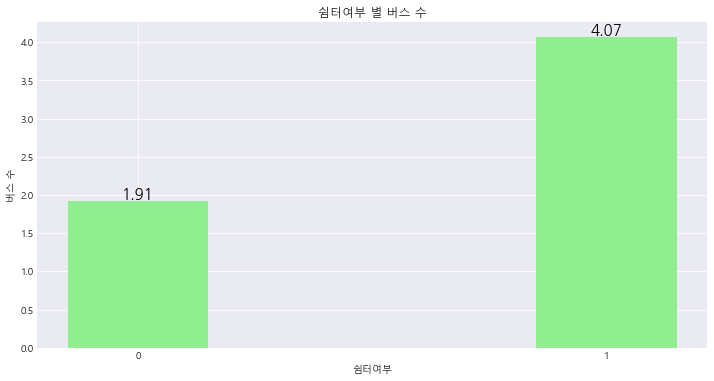

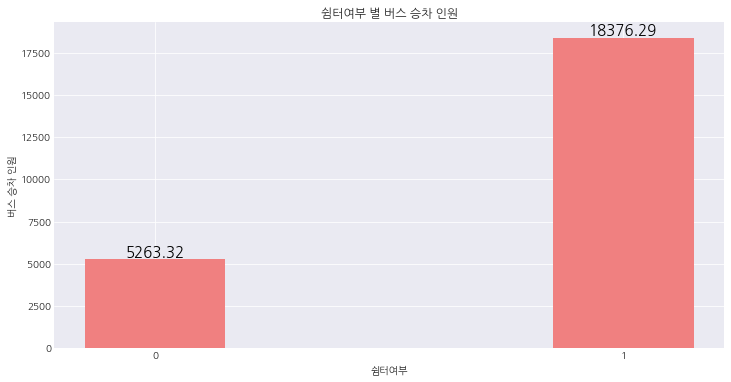

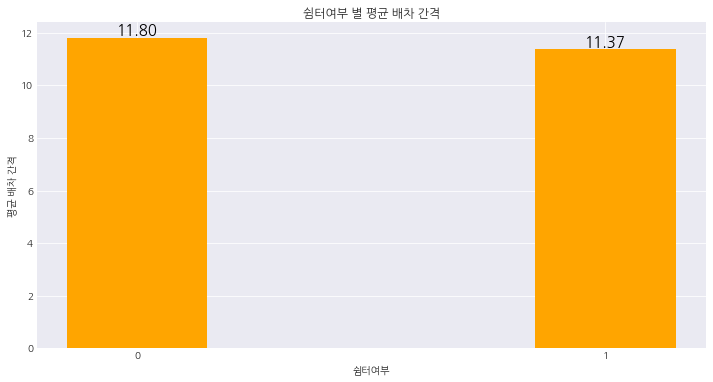

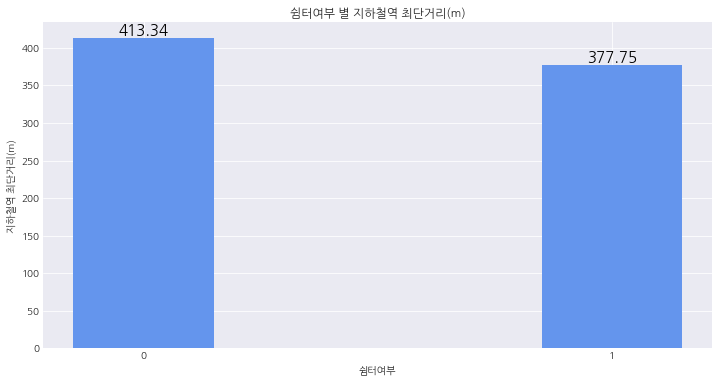

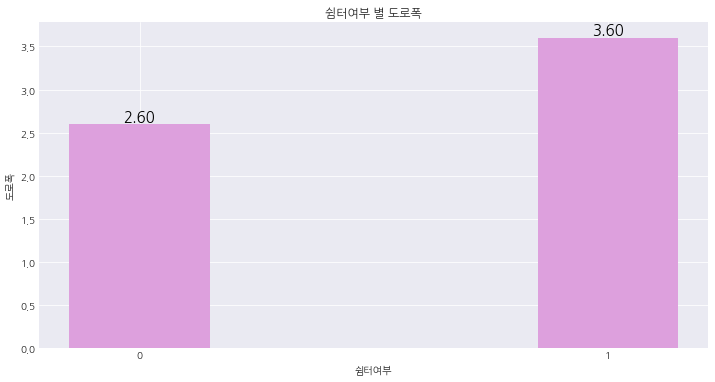

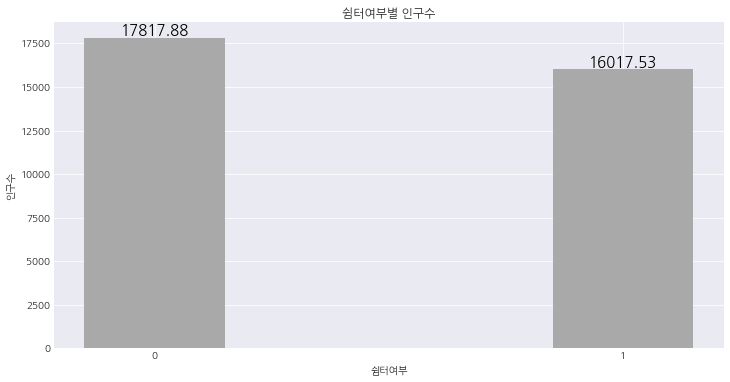

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.rc("font", family='NanumGothic')
plt.title("쉼터여부 별 버스 수")
plt.xlabel('쉼터여부')
plt.ylabel('버스 수')
plt.bar([0,1],list1, width=0.3,color = 'lightgreen')
for i, v in enumerate([0,1]):
    plt.text(v, list1[i], format(list1[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()


plt.rc("font", family='NanumGothic')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.title("쉼터여부 별 버스 승차 인원")
plt.xlabel('쉼터여부')
plt.ylabel('버스 승차 인원')
plt.bar([0,1],list2, width=0.3,color = 'lightcoral')
for i, v in enumerate([0,1]):
    plt.text(v, list2[i], format(list2[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()


plt.rc("font", family='NanumGothic')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.title("쉼터여부 별 평균 배차 간격")
plt.xlabel('쉼터여부')
plt.ylabel('평균 배차 간격')
plt.bar([0,1],list3, width=0.3, color='orange')
for i, v in enumerate([0,1]):
    plt.text(v, list3[i], format(list3[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()


plt.rc("font", family='NanumGothic')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.title("쉼터여부 별 지하철역 최단거리(m)")
plt.xlabel('쉼터여부')
plt.ylabel('지하철역 최단거리(m)')
plt.bar([0,1],list4, width=0.3, color = 'cornflowerblue')
for i, v in enumerate([0,1]):
    plt.text(v, list4[i], format(list4[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()


plt.rc("font", family='NanumGothic')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.title("쉼터여부 별 도로폭")
plt.xlabel('쉼터여부')
plt.ylabel('도로폭')
plt.bar([0,1],list5, width=0.3, color = 'plum')
for i, v in enumerate([0,1]):
    plt.text(v, list5[i], format(list5[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()


plt.rc("font", family='NanumGothic')
plt.figure(figsize=(12,6))
plt.xticks(np.arange(0,2,1))
plt.title("쉼터여부별 인구수")
plt.xlabel('쉼터여부')
plt.ylabel('인구수')
bar = plt.bar([0,1],list6, width=0.3, color = 'darkgrey')
for i, v in enumerate([0,1]):
    plt.text(v, list6[i], format(list6[i], ".2f"),                
             fontsize = 15, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.show()
